# Python Example: VAR(1) Process Simulation
In this example, we simulate a Vector Autoregressive (VAR(1)) process using Python. We will generate a synthetic multivariate time series with three interrelated components, compute the mean vector, covariance matrix, and visualize the relationships using scatter plots and cross-correlation plots.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from scipy.stats import zscore

## Simulating VAR(1) Process
We generate a multivariate time series using the VAR(1) model. This step simulates three variables with a predefined transition matrix.

In [2]:
# Simulate VAR(1) time series
np.random.seed(42)
L = 1000  # length of time series
p = 3     # number of variables

# Transition matrix for VAR(1) process
A = np.array([[0.7, 0.1, 0.0],
              [0.3, 0.5, 0.2],
              [0.0, 0.2, 0.6]])

# Innovation (noise) covariance
cov = np.array([[1, 0.5, 0.3],
                [0.5, 1, 0.4],
                [0.3, 0.4, 1]])

# Generate random noise
noise = np.random.multivariate_normal(np.zeros(p), cov, L)

# Initialize the time series data
data = np.zeros((L, p))

# Simulate the VAR(1) process
for t in range(1, L):
    data[t] = A @ data[t-1] + noise[t]

# Create DataFrame
df = pd.DataFrame(data, columns=['Y1', 'Y2', 'Y3'])

# Display the first few rows
df.head()

,Y1,Y2,Y3
0,0.000000,0.000000,0.000000
1,-1.396059,-1.181394,-0.953452
2,-2.164377,-2.159567,-2.530460
3,-2.564217,-2.507741,-2.093561
4,-3.843029,-2.003414,-0.906080


## Mean Vector
We compute the mean vector, which summarizes the average behavior of each time series component.

In [3]:
# Mean vector
mean_vector = df[['Y1', 'Y2', 'Y3']].mean()
print('Mean Vector:')
print(mean_vector)

Mean Vector:
Y1   -0.218121
Y2   -0.378238
Y3   -0.256797
dtype: float64


## Covariance Matrix
The (empirical) covariance matrix is computed to quantify how much each pair of variables co-varies.

In [4]:
# Covariance matrix
cov_matrix = df[['Y1', 'Y2', 'Y3']].cov()
print('Covariance Matrix:')
print(cov_matrix)

Covariance Matrix:
          Y1        Y2        Y3
Y1  2.852906  2.483595  1.390338
Y2  2.483595  3.519931  2.107383
Y3  1.390338  2.107383  2.500952


## Scatter Plots and Correlation Coefficients
Scatter plots are used to visualize the pairwise relationships between the variables. The correlation coefficients are computed and displayed in the titles of the plots.

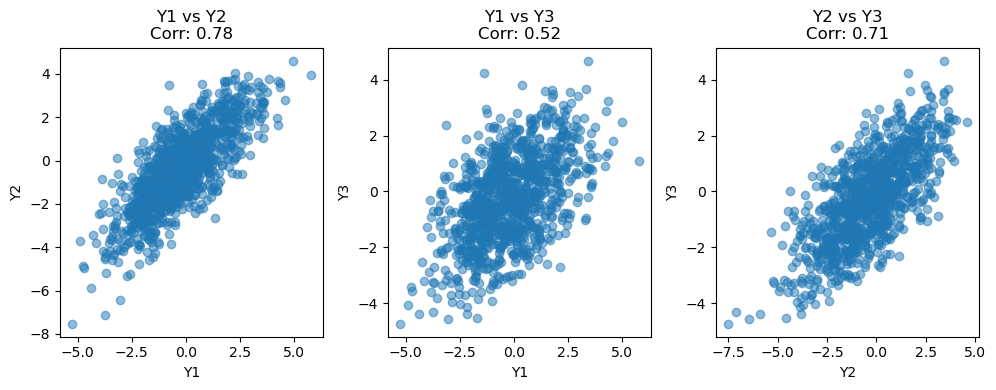

In [5]:
# Scatter plots between Y1, Y2, and Y3
plt.figure(figsize=(10, 4))

# Compute the Pearson correlation coefficients
corr_Y1_Y2 = df['Y1'].corr(df['Y2'])
corr_Y1_Y3 = df['Y1'].corr(df['Y3'])
corr_Y2_Y3 = df['Y2'].corr(df['Y3'])

# Y1 vs Y2
plt.subplot(1, 3, 1)
plt.scatter(df['Y1'], df['Y2'], alpha=0.5)
plt.title(f'Y1 vs Y2\nCorr: {corr_Y1_Y2:.2f}')
plt.xlabel('Y1')
plt.ylabel('Y2')

# Y1 vs Y3
plt.subplot(1, 3, 2)
plt.scatter(df['Y1'], df['Y3'], alpha=0.5)
plt.title(f'Y1 vs Y3\nCorr: {corr_Y1_Y3:.2f}')
plt.xlabel('Y1')
plt.ylabel('Y3')

# Y2 vs Y3
plt.subplot(1, 3, 3)
plt.scatter(df['Y2'], df['Y3'], alpha=0.5)
plt.title(f'Y2 vs Y3\nCorr: {corr_Y2_Y3:.2f}')
plt.xlabel('Y2')
plt.ylabel('Y3')

plt.tight_layout()
plt.show()

## Cross-Correlation Function (CCF)
Finally, we compute and plot the cross-correlation functions for each pair of variables across different time lags using a matrix plot.

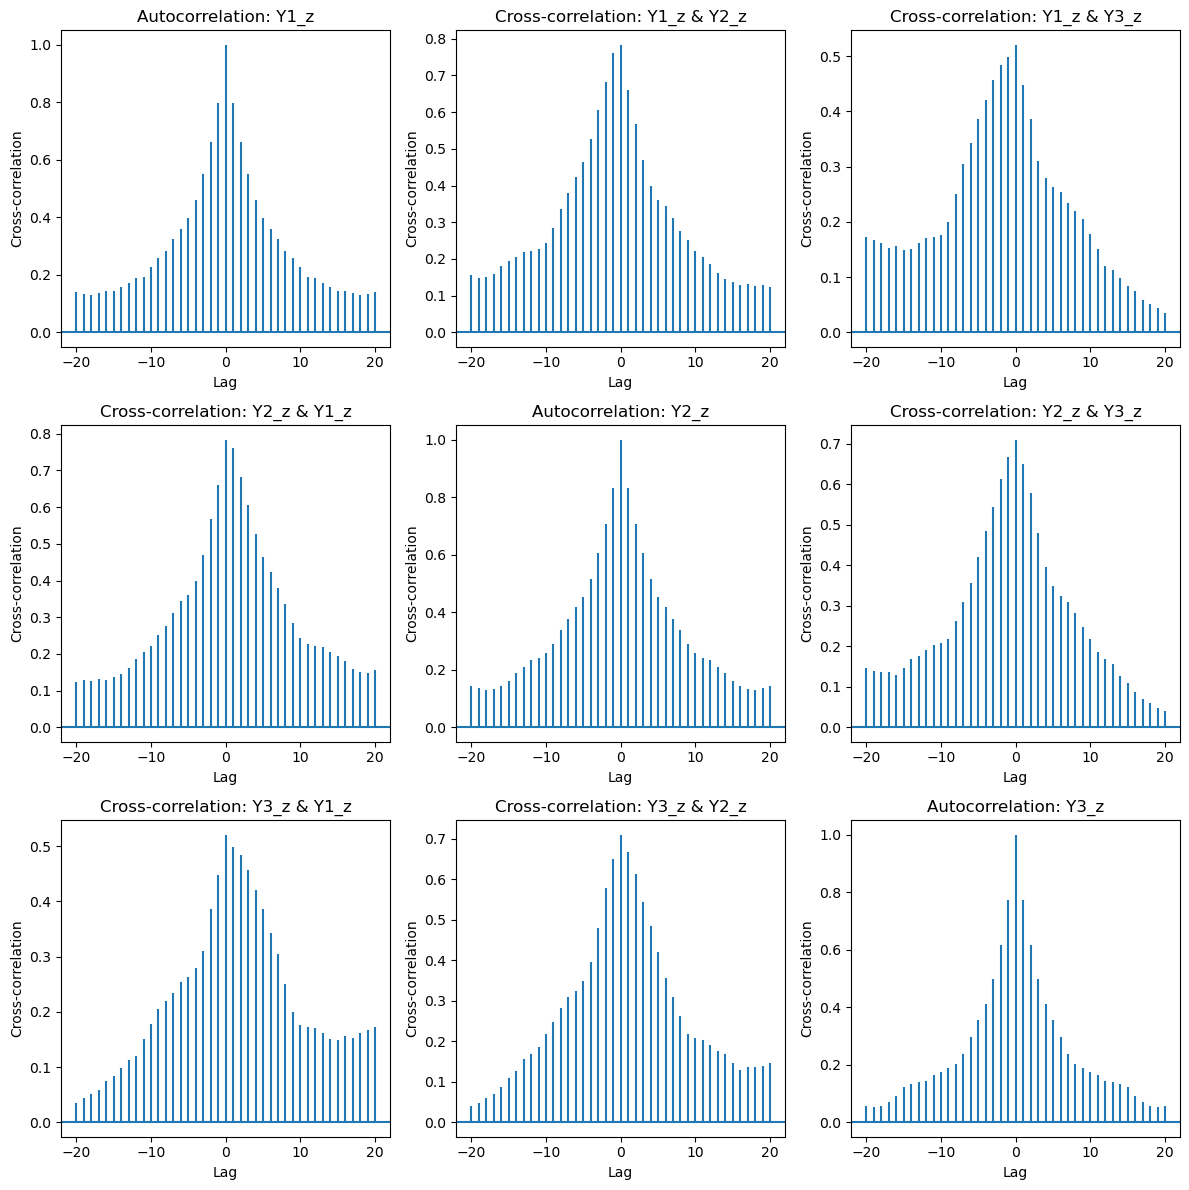

In [6]:
# Standardizing the series (z-scores)
df['Y1_z'] = zscore(df['Y1'])
df['Y2_z'] = zscore(df['Y2'])
df['Y3_z'] = zscore(df['Y3'])

# List of standardized variables
variables = ['Y1_z', 'Y2_z', 'Y3_z']

# Create subplots for cross-correlation matrix
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
max_lags = 20  # Maximum number of lags

# Plot cross-correlations for each pair of variables
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:
            # Autocorrelation on the diagonal
            axes[i, j].xcorr(df[var1], df[var2], maxlags=max_lags)
            axes[i, j].set_title(f'Autocorrelation: {var1}')
        else:
            # Cross-correlation for off-diagonal elements
            axes[i, j].xcorr(df[var1], df[var2], maxlags=max_lags)
            axes[i, j].set_title(f'Cross-correlation: {var1} & {var2}')

        axes[i, j].set_xlabel('Lag')
        axes[i, j].set_ylabel('Cross-correlation')

plt.tight_layout()
plt.show()